### Solar flare ribbon evolution from Qiu 2008

In [24]:
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy import units as u
from astropy.visualization import quantity_support

from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#Move up to RAFTS directory
if os.getcwd().endswith('/RAFTS'):
    pass
else:
    os.chdir('../../')
    print(os.getcwd())

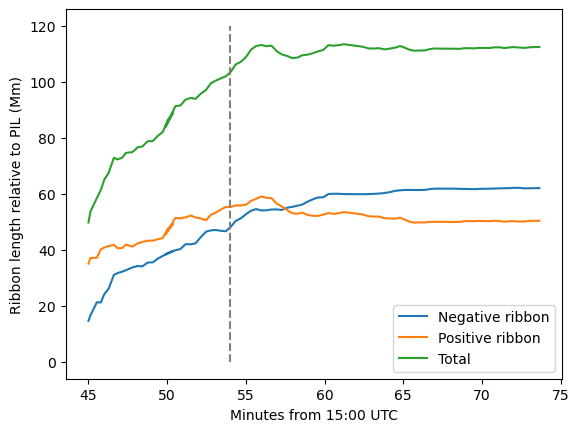

In [15]:
nribbon_trace = np.loadtxt('nribbon_trace.txt', delimiter=',')
pribbon_trace = np.loadtxt('pribbon_trace.txt', delimiter=',')

f = interp1d(nribbon_trace[:,0], nribbon_trace[:,1], fill_value='extrapolate')

ribbonx = pribbon_trace[:,0]

plt.plot(ribbonx, f(pribbon_trace[:,0]) * u.Mm, label='Negative ribbon')
plt.plot(ribbonx, pribbon_trace[:,1] * u.Mm, label='Positive ribbon')
plt.plot(ribbonx, np.sum([pribbon_trace[:,1], f(pribbon_trace[:,0])], axis=0) * u.Mm, label='Total')
         
plt.vlines(54, 0, 120, color='grey', ls='--')
plt.xlabel('Minutes from 15:00 UTC')
plt.ylabel('Ribbon length relative to PIL (Mm)')
plt.legend()

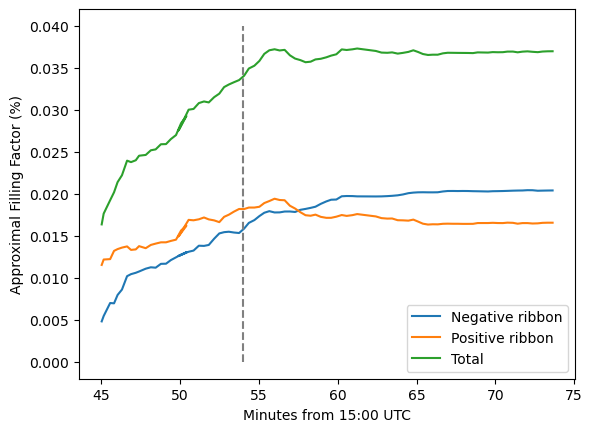

In [16]:
meanRibbonWidth = 5.0 * u.Mm

with quantity_support():
    plt.plot(pribbon_trace[:,0], ((f(pribbon_trace[:,0]) * u.Mm * meanRibbonWidth) / (np.pi * 1.0 * u.Rsun * u.Rsun).to("Mm2")) * 100, label='Negative ribbon')
    plt.plot(pribbon_trace[:,0], ((pribbon_trace[:,1] * u.Mm * meanRibbonWidth) / (np.pi * 1.0 * u.Rsun * u.Rsun).to("Mm2")) * 100, label='Positive ribbon')
    plt.plot(pribbon_trace[:,0], (np.sum([pribbon_trace[:,1], f(pribbon_trace[:,0])], axis=0) * u.Mm * meanRibbonWidth) / (np.pi * 1.0 * u.Rsun * u.Rsun).to("Mm2") * 100, label='Total')
    plt.vlines(54, 0, 0.04, color='grey', ls='--')
    plt.xlabel('Minutes from 15:00 UTC')
    plt.ylabel('Approximal Filling Factor (%)')
    plt.legend()

In [17]:
tot = np.sum([pribbon_trace[:,1], f(pribbon_trace[:,0])], axis=0)
peak_val = tot[abs(ribbonx - 54) == abs(ribbonx - 54).min()]
peak_val

array([103.60533657])

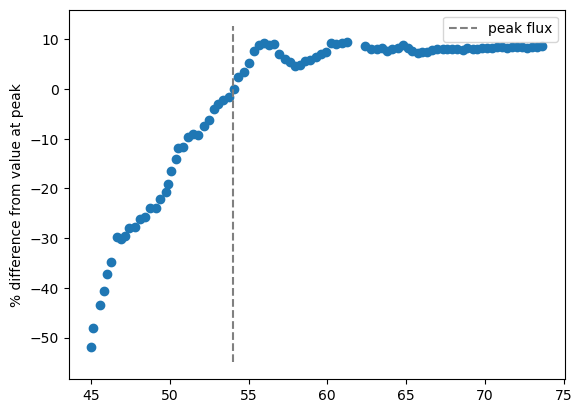

In [18]:
fig, ax = plt.subplots()
ax.scatter(ribbonx, ((tot - peak_val) / peak_val) * 100)
ax.vlines(54, ax.get_ylim()[0], ax.get_ylim()[1], color='grey', ls='--', label='peak flux')
plt.ylabel('% difference from value at peak')
plt.legend()

In [19]:
print("Post-peak max percent change per min = {0:.3f}% / min".format(np.diff(((tot[ribbonx > 54][::2] - peak_val) / peak_val) * 100).max() / (np.diff(ribbonx).mean() * 2)))

Post-peak max percent change per min = 6.432% / min


In [20]:
print("Post-peak max percent change per second = {0:.3f}% / s".format(np.diff(((tot[ribbonx > 54][::2] - peak_val) / peak_val) * 100).max() / (np.diff(ribbonx).mean() * 2 * 60)))

Post-peak max percent change per second = 0.107% / s


In [21]:
print("Pre-peak max percent change per second = {0:.3f}% / s".format(np.diff(((tot[ribbonx <= 54][::2] - peak_val) / peak_val) * 100).max() / (np.diff(ribbonx).mean() * 2 * 60)))

Pre-peak max percent change per second = 0.219% / s
